In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
import warnings
warnings.filterwarnings('ignore')

**Cкачать набор данных маркетинговых кампаний отсюда https://www.kaggle.com/davinwijaya/customer-retention <br>
Примечание: датасет есть в архиве материалов к 4 уроку**

In [2]:
df = pd.read_csv('HW_data.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


**Поле conversion - это целевая переменная, а offer - коммуникация. Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.**

In [3]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)
df['treatment'] = df['treatment'].map(lambda x: 0 if x == 'No Offer' else 1)
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0
63996,5,38.91,0,1,Urban,1,Phone,1,0
63997,6,29.99,1,0,Urban,1,Phone,1,0
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0


**Сделать feature engineering на ваше усмотрение (допускается свобода выбора методов)**

In [6]:
def FeatureGenerator(dframe):
    pre_name = 'is_'
    
    col_names = ['channel', 'zip_code']
    
    for col in col_names:
        for el in dframe[col].unique():
            new_col_name = pre_name + el
            dframe[new_col_name] = 0
            dframe.loc[dframe[col] == el, new_col_name] = 1
            
    dframe['discount_bogo'] = 0.5
    dframe.loc[(dframe['used_discount'] == 0) & (dframe['used_bogo'] == 0), 'discount_bogo'] = 0
    dframe.loc[(dframe['used_discount'] == 1) & (dframe['used_bogo'] == 1), 'discount_bogo'] = 1
    
    return dframe

In [7]:
df = FeatureGenerator(df)
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target,is_Phone,is_Web,is_Multichannel,is_Surburban,is_Rural,is_Urban,discount_bogo
0,10,142.44,1,0,Surburban,0,Phone,1,0,1,0,0,1,0,0,0.5
1,6,329.08,1,1,Rural,1,Web,0,0,0,1,0,0,1,0,1.0
2,7,180.65,0,1,Surburban,1,Web,1,0,0,1,0,1,0,0,0.5
3,9,675.83,1,0,Rural,1,Web,1,0,0,1,0,0,1,0,0.5
4,2,45.34,1,0,Urban,0,Web,1,0,0,1,0,0,0,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0,0,1,0,0,0,1,0.5
63996,5,38.91,0,1,Urban,1,Phone,1,0,1,0,0,0,0,1,0.5
63997,6,29.99,1,0,Urban,1,Phone,1,0,1,0,0,0,0,1,0.5
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0,0,0,1,1,0,0,0.5


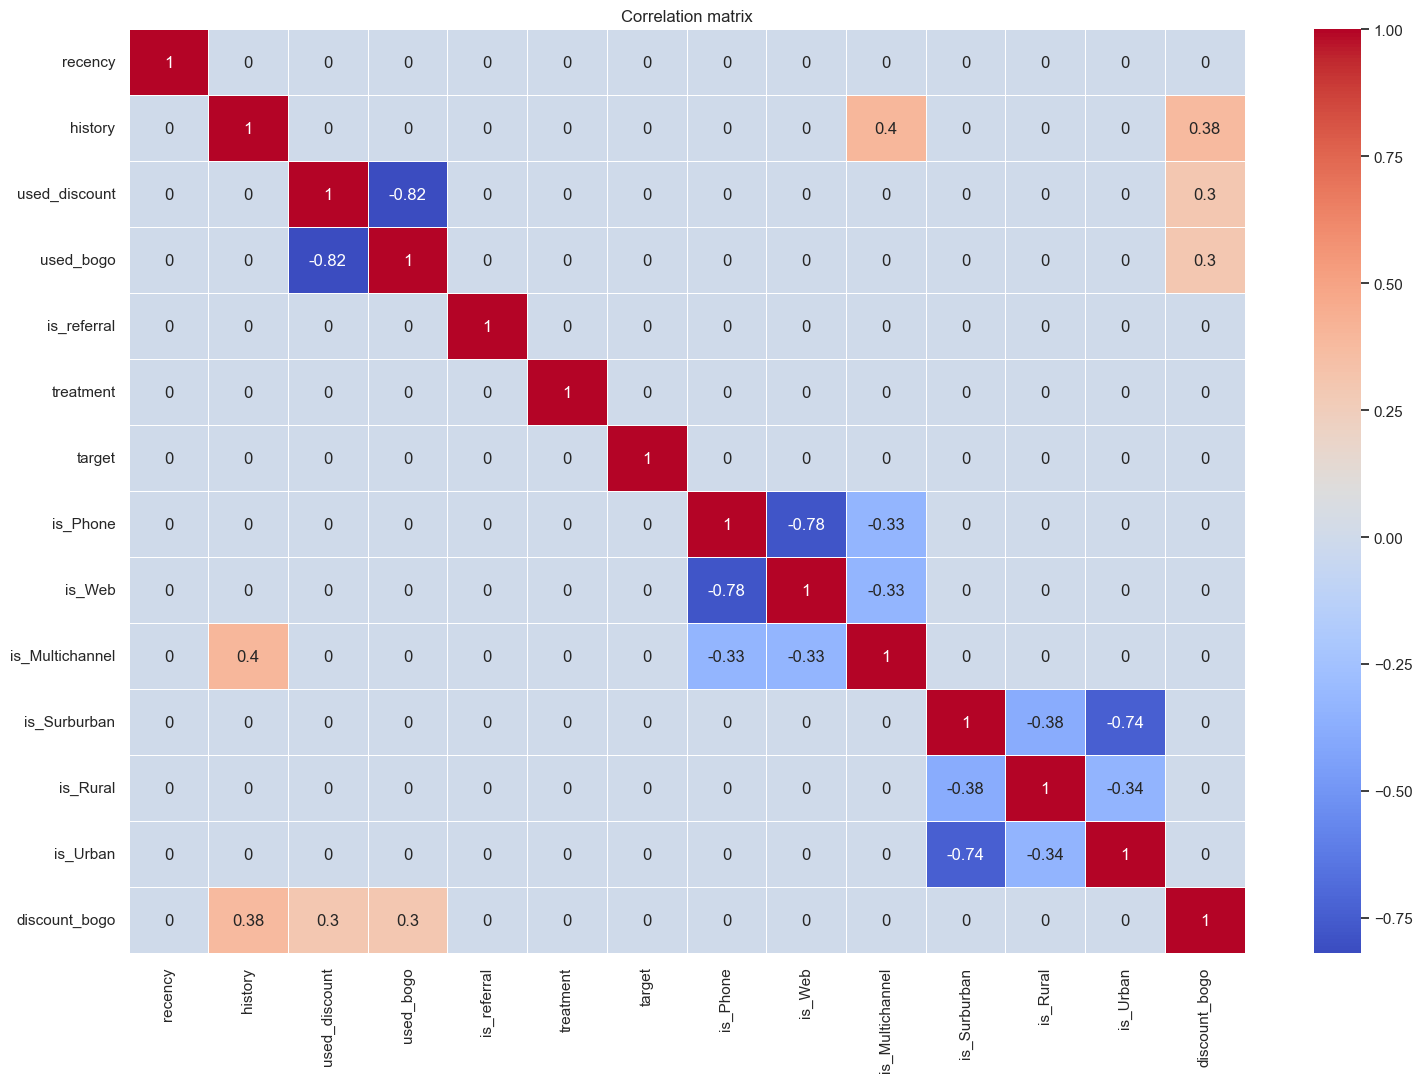

In [10]:
plt.figure(figsize=(18, 12))

sns.set(font_scale=1)

corr_X = df.corr()
corr_X = np.round(corr_X, 2)
corr_X[np.abs(corr_X) < 0.3] = 0

sns.heatmap(corr_X, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Сделать разбиение набора данных не тренировочную и тестовую выборки**

In [11]:
target = 'target'

X = df.drop(columns=target)
y = df[target]

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100)